In [1]:
from google.colab import files
upload = files.upload()

Saving Movies_India.csv to Movies_India.csv


In [2]:
import pandas as pd

movies = pd.read_csv('Movies_India.csv',encoding='latin-1')
movies.sample(6)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
11238,Pyar Hi Pyar,(1969),135 min,Romance,6.9,64,Bhappi Sonie,Vyjayanthimala,Dharmendra,Pran
3285,Daanveer,(1996),NaN,"Action, Crime, Drama",3.6,17,T.L.V. Prasad,Vikas Anand,Anusha,Asrani
2281,Bhoot Ka Pyar,(2005),NaN,Drama,NaN,NaN,Shabbir Khan,NaN,NaN,NaN
10052,Navjeevan,(1935),NaN,NaN,3.4,5,Mohan Dayaram Bhavnani,NaN,NaN,NaN
705,Agni Prem,(2003),NaN,Thriller,NaN,NaN,Chandni Gupta,Junior Shakti Kapoor,Amit Pachori,Aman Sagar
13692,Table No. 21,(2013),108 min,"Adventure, Drama, Thriller",7.2,"11,709",Aditya Datt,Paresh Rawal,Rajeev Khandelwal,Tina Desai


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
nb_null = movies.isnull().sum()
nb_null

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
_ = round(nb_null/movies.isnull().count() * 100,2).sort_values(ascending=False)
_

Duration    53.32
Rating      48.94
Votes       48.93
Actor 3     20.27
Actor 2     15.37
Genre       12.10
Actor 1     10.43
Year         3.40
Director     3.39
Name         0.00
dtype: float64

In [6]:
table_null = pd.concat([nb_null,_],axis=1,keys=["total","%"])
table_null

,total,%
Name,0,0.00
Year,528,3.40
Duration,8269,53.32
Genre,1877,12.10
Rating,7590,48.94
Votes,7589,48.93
Director,525,3.39
Actor 1,1617,10.43
Actor 2,2384,15.37
Actor 3,3144,20.27


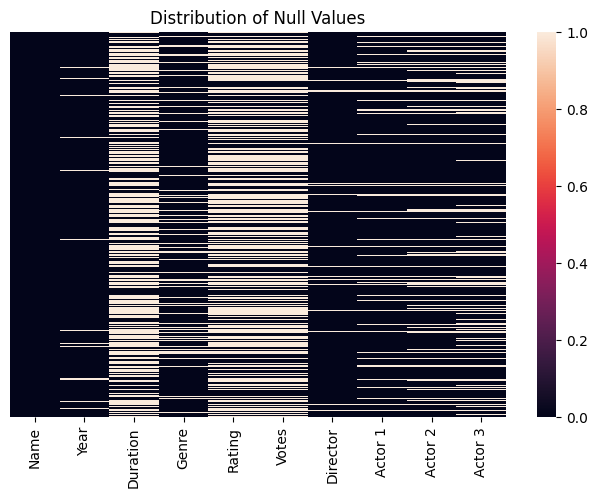

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(movies.isnull(), cbar=True, yticklabels=False)
plt.title('Distribution of Null Values')
plt.show()

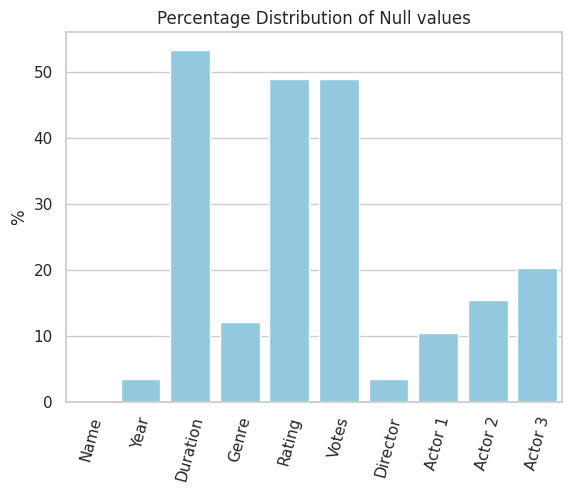

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style="whitegrid")
sns.barplot(x=movies.columns, y=table_null['%'], color='skyblue')

plt.title('Percentage Distribution of Null values')
plt.xticks(rotation=75)
plt.show()


In [9]:
movies_tmp = movies.dropna(axis=0)
movies.shape , movies_tmp.shape

((15509, 10), (5659, 10))

In [10]:
movies_tmp['Year'] = movies_tmp['Year'].str.extract('(\d+)').astype(int)
movies_tmp[['Year','Rating']]

<ipython-input-10-21799110d063>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_tmp['Year'] = movies_tmp['Year'].str.extract('(\d+)').astype(int)


,Year,Rating
1,2019,7.0
3,2019,4.4
5,1997,4.7
6,2005,7.4
8,2012,5.6
...,...,...
15493,2015,6.1
15494,2001,6.2
15503,1989,5.8
15505,1999,4.5


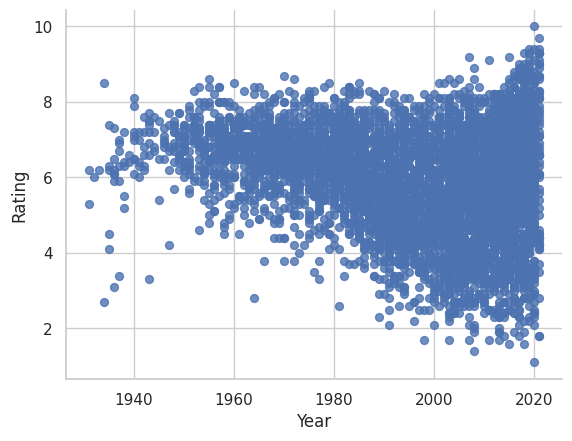

In [11]:

from matplotlib import pyplot as plt
movies_tmp.plot(kind='scatter', x='Year', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
movies_tmp[['Year','Votes']].sort_values(ascending=False,by='Votes')

,Year,Votes
12569,1978,999
5663,1976,998
7930,2000,996
14286,2010,99
9055,1983,99
...,...,...
4785,2014,"1,008"
3494,1997,"1,006"
8306,2011,"1,006"
10697,1991,"1,004"


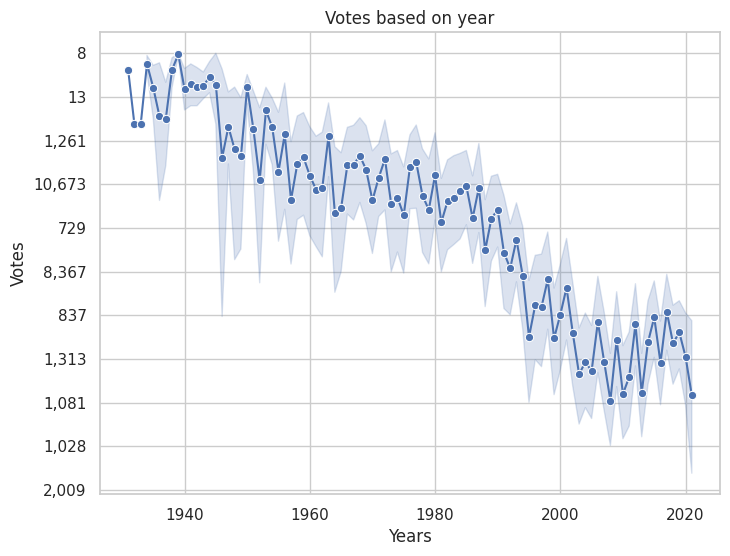

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(data=movies_tmp, x='Year', y='Votes', marker='o', linestyle='-',color='b')
plt.title('Votes based on year')
plt.xlabel('Years')
plt.ylabel('Votes')
plt.yticks(range(0, 1001, 100))
plt.show()

In [14]:
movies_tmp.sample(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
7522,Khatarnaak,1990,223 min,"Action, Crime, Drama",5.2,82,Bharat Rangachary,Sanjay Dutt,Anita Raj,Farha Naaz
3865,Dil Kabaddi,2008,120 min,"Comedy, Drama",5.7,653,Anil Senior,Irrfan Khan,Rahul Bose,Rahul Khanna
13380,Sonu Ke Titu Ki Sweety,2018,138 min,"Comedy, Romance",7.1,"20,000",Luv Ranjan,Kartik Aaryan,Nushrat Bharucha,Sunny Singh Nijjar


In [15]:
#@title Max/Min Duration

listes = movies_tmp['Duration'].str.split(' ').to_list()
duration = [int(liste[0]) for liste in listes]

max_duration = max(duration)
min_duration = min(duration)

print(f'The maximum duration of a film {max_duration} min\n')
print(f'The minimum duration of a film {min_duration} min\n')

The maximum duration of a film 321 min

The minimum duration of a film 21 min



In [16]:
movies_tmp['Genre'].value_counts()

Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: Genre, Length: 376, dtype: int64

In [17]:
movies_tmp.groupby('Genre')['Votes'].max()

Genre
Action                             93
Action, Adventure                 963
Action, Adventure, Biography    1,343
Action, Adventure, Comedy       9,428
Action, Adventure, Crime           95
                                ...  
Thriller, Action                   34
Thriller, Musical, Mystery        341
Thriller, Mystery                  32
Thriller, Mystery, Family          38
War                                52
Name: Votes, Length: 376, dtype: object

In [18]:
movies_tmp.sample(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
5516,Haré Rama Haré Krishna,1971,149 min,"Drama, Musical",7.2,770,Dev Anand,Zeenat Aman,Dev Anand,Mumtaz
3221,Congregation,1986,140 min,Drama,6.5,15,Muzaffar Ali,Shabana Azmi,Farooq Shaikh,Rohini Hattangadi
7506,Khandaani Shafakhana,2019,136 min,"Comedy, Drama",4.0,"1,141",Shilpi Dasgupta,Sonakshi Sinha,Badshah,Varun Sharma


In [19]:
act1 = round(movies_tmp.groupby('Actor 1')['Rating'].transform('mean'),2)
act1 = list(act1)

In [20]:
act2 = round(movies_tmp.groupby('Actor 2')['Rating'].transform('mean'),2)
act2 = list(act2)

In [21]:
act3 = round(movies_tmp.groupby('Actor 3')['Rating'].transform('mean'),2)
act3 = list(act3)

In [22]:
genre = round(movies_tmp.groupby('Genre')['Rating'].transform('mean'),2)
genre = list(genre)

In [23]:
dirc = round(movies_tmp.groupby('Director')['Rating'].transform('mean'),2)
dirc = list(dirc)

In [24]:
movies_tmp['act1'] = act1
movies_tmp['act2'] = act2
movies_tmp['act3'] = act3
movies_tmp['genre'] = genre
movies_tmp['dirc'] = dirc

movies_tmp.sample(3)

<ipython-input-24-6cadbf1bcf69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_tmp['act1'] = act1
<ipython-input-24-6cadbf1bcf69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_tmp['act2'] = act2
<ipython-input-24-6cadbf1bcf69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,act1,act2,act3,genre,dirc
14953,Wafaa,2008,120 min,"Drama, Mystery, Romance",3.7,77,Rakesh Sawant,Rajesh Khanna,Shahib Chopra,Laila Khan,6.57,5.20,3.70,5.15,6.15
4154,Double Dhamaal,2011,138 min,"Comedy, Crime, Drama",3.8,"3,642",Indra Kumar,Sanjay Dutt,Riteish Deshmukh,Arshad Warsi,5.26,4.36,5.18,5.73,5.28
3509,David,2013,155 min,"Action, Crime, Drama",6.2,"2,608",Bejoy Nambiar,Vikram,Neil Nitin Mukesh,Vinay Virmani,6.43,4.53,6.20,5.74,7.00


In [25]:
movies_tmp.drop(['Duration','Genre','Name','Director','Actor 1','Actor 2','Actor 3'],axis=1,inplace=True)
movies_tmp

<ipython-input-25-a260645d0684>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_tmp.drop(['Duration','Genre','Name','Director','Actor 1','Actor 2','Actor 3'],axis=1,inplace=True)


,Year,Rating,Votes,act1,act2,act3,genre,dirc
1,2019,7.0,8,6.85,7.00,7.00,6.42,7.00
3,2019,4.4,35,5.42,4.40,4.45,5.72,4.40
5,1997,4.7,827,4.79,5.79,5.87,6.24,5.31
6,2005,7.4,"1,086",5.44,6.93,6.50,6.82,7.38
8,2012,5.6,326,5.60,5.88,5.60,5.48,5.60
...,...,...,...,...,...,...,...,...
15493,2015,6.1,408,6.72,6.10,5.85,6.42,6.10
15494,2001,6.2,"1,496",4.16,5.82,5.95,6.95,7.25
15503,1989,5.8,44,6.31,5.80,6.05,5.74,6.27
15505,1999,4.5,655,5.48,4.64,5.74,5.52,5.22


In [26]:
from sklearn.model_selection import train_test_split

X = movies_tmp[['act1','act2',	'act3','genre','dirc','Year','Votes']]
Y = movies_tmp['Rating']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= .1, random_state = 42)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5093 entries, 2637 to 2209
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   act1    5093 non-null   float64
 1   act2    5093 non-null   float64
 2   act3    5093 non-null   float64
 3   genre   5093 non-null   float64
 4   dirc    5093 non-null   float64
 5   Year    5093 non-null   int64  
 6   Votes   5093 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 318.3+ KB


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

x_train['Votes'] = x_train['Votes'].astype(str)
x_train['Votes'] = x_train['Votes'].str.replace(',', '').astype(int)

x_test['Votes'] = x_test['Votes'].astype(str)
x_test['Votes'] = x_test['Votes'].str.replace(',', '').astype(int)

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
from sklearn.metrics import mean_absolute_error, r2_score ,mean_squared_error

print(' error:', mean_absolute_error(y_test, lr.predict(x_test)))
print(' Score', r2_score(y_test, lr.predict(x_test)))

 error: 0.48960236790120426
 Score 0.7771559635723827


In [29]:
y_pred = lr.predict(x_test)
mean_squared_error(y_test,lr.predict(x_test))

0.4281554971244264